In [55]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [56]:
#DEFINICIÓN DE PATÁMETROS
N= 30
M= 40
v0= 0.5
#Función que me da el valor del potencial en x=0
h1= lambda x: 0

#Función que me da el valor del potencial en x=a=N
h2=lambda x: 0
#Función que me da el valor del potencial en y=0
h3=lambda y:-v0
#Función que me da el valor del potencial en y=b=M
h4=lambda y: v0
delta=0
#Cantidad de puntos
Z=51


In [57]:
x = np.linspace(0,N,Z)
y = np.linspace(0,M,Z)
#Paso en la diferenciación delta=dx=dy
delta = x[1]-x[0]

In [58]:
#CREAMOS LA MATRIZ

def InitT():
    
    T = np.zeros((Z,Z))
    
    T[0,:] = h1(x)
    T[-1,:] = h2(x)
    T[:,0] = h3(y)
    T[:,-1] = h4(y)
    
    return T

In [59]:

T = InitT()

In [60]:
def Relajacion(T,itera = int(1e5),tolerancia = 1e-4):
    
    #En principio iteramos como máximo 1e5 veces sin embargo el método termina 
    #tan pronto como el cambio del potencial de un punto a otro sea pequeño y 
    #ese "pequeño" esta dado por la tolerancia

    for it in tqdm(range(itera)):
        #Hace referencia a la diferencia máxima entre los valores del potencial de un vecino a otro
        #la idea es que este dmax sea cada vez más pequeño y llegue a ser menor a la tolerancia
        dmax = 0.
        
        #Iteramos por todos los elementos de la matriz sin tocar las fronteras
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):

                #Como se encontró en la discretización tomamos el promedio de los vecinos
                
                tmp = 0.25*( T[i+1,j] + T[i-1,j] + T[i,j+1] + T[i,j-1] )
                
                # Restamos los valores anteriores de la red a los calculados
                r = (tmp - T[i,j])
                
                # Actualizamos la matrix
                T[i,j] += r
                

                if np.abs(r) > dmax:
                    dmax = r
        #Si el valor del potencial no fluctua mucho de un punto a otro detenemos las iteraciones
        if np.abs(dmax) < tolerancia:
            break
            
    return T
        

In [61]:
T = InitT()
solnum =  Relajacion(T)

  0%|          | 360/100000 [00:12<59:43, 27.81it/s]  


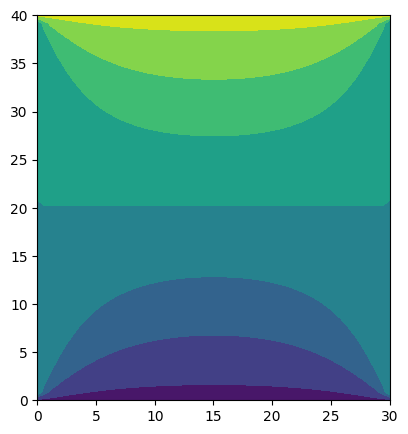

In [62]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)

X,Y = np.meshgrid(x,y)

c = ax.contourf(X,Y,solnum.T)

plt.show()

In [63]:
def analitica(K):
    

        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):

                pot=0

                for n in range(1,100,2):

                    cte=1/(np.sinh((n*np.pi*M)/N))
                    xpart= np.sin((n*np.pi*i)/N)
                    pot+= cte*xpart*(np.sinh((n*np.pi*j)/N)-np.sinh((n*np.pi*(M-j))/N))
                               
                K[i,j] = (pot*4*v0)/N
                
        return K
        

In [64]:
K = InitT()
solan =  analitica(K)

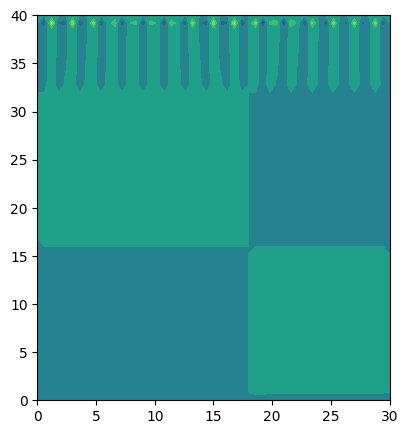

In [65]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)

X,Y = np.meshgrid(x,y)

c = ax.contourf(X,Y,solan.T)

plt.show()

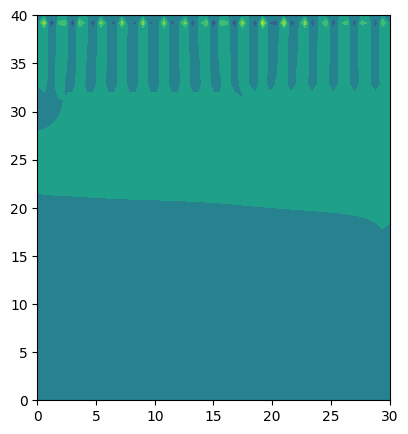

In [66]:
error=T-K

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)

X,Y = np.meshgrid(x,y)

c = ax.contourf(X,Y,error.T)

plt.show()

